In [17]:
# =====================
# Core Libraries
# =====================
import numpy as np
import pandas as pd

# =====================
# Visualization
# =====================
import seaborn as sns
import matplotlib.pyplot as plt

# =====================
# Preprocessing
# =====================
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer

# =====================
# Model Selection & Tuning
# =====================
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# =====================
# Regression Models
# =====================
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor

# =====================
# Classification Models
# =====================
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# =====================
# Pipelines
# =====================
from sklearn.pipeline import Pipeline

# =====================
# Metrics
# =====================
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve,
                             roc_auc_score, precision_score,
                             recall_score, f1_score)

# =====================
# Other Useful Tools
# =====================
from sklearn.datasets import make_regression
from numpy import log1p


In [5]:
data = pd.read_csv("train.csv")

In [3]:
data

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


<Axes: xlabel='job', ylabel='y'>

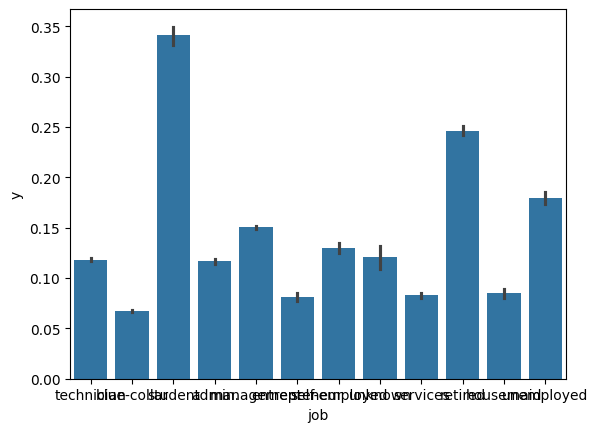

In [ ]:
sns.barplot(data=data,x="job" , y="y" )

<Axes: xlabel='housing', ylabel='y'>

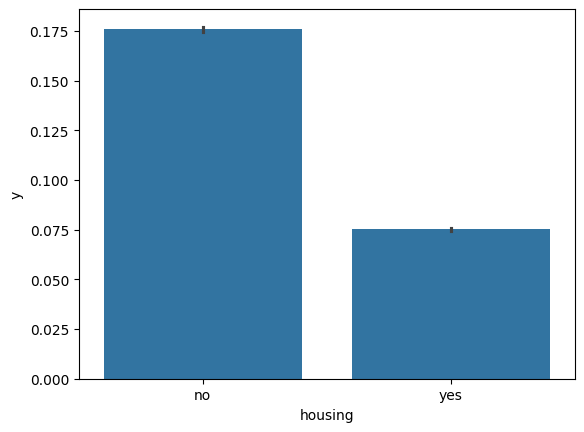

In [7]:
sns.barplot(data=data,x="housing" , y="y" )

<Axes: xlabel='loan', ylabel='y'>

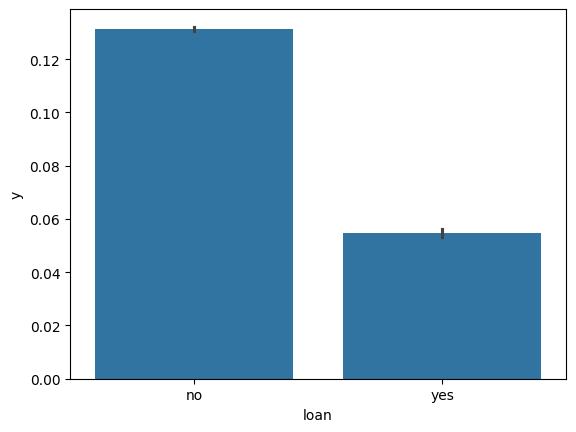

In [8]:
sns.barplot(data=data,x="loan" , y="y" )

In [20]:
for col in data.columns:
    uniques = data[col].unique()  # get unique values
    print(f"This is count of values for {col}: length: {len(uniques)} | values: {uniques}")


This is count of values for id: length: 750000 | values: [     0      1      2 ... 749997 749998 749999]
This is count of values for age: length: 78 | values: [42 38 36 27 26 24 39 50 46 32 37 57 33 47 35 49 77 40 54 56 51 30 67 58
 59 45 43 29 48 31 28 34 60 52 41 81 23 62 53 72 55 25 44 61 63 69 75 71
 64 22 83 70 80 21 65 74 68 19 73 66 79 20 84 86 76 18 82 78 87 85 88 94
 93 89 92 95 90 91]
This is count of values for job: length: 12 | values: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
This is count of values for marital: length: 3 | values: ['married' 'single' 'divorced']
This is count of values for education: length: 4 | values: ['secondary' 'primary' 'tertiary' 'unknown']
This is count of values for default: length: 2 | values: ['no' 'yes']
This is count of values for balance: length: 8217 | values: [    7   514   602 ... 13023  4003  8218]
This is count of values for housin

In [6]:
def one_hot_encode_all(df: pd.DataFrame):
    # Select only categorical/object columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Perform one-hot encoding for all categorical columns
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    df_encoded = df_encoded.drop("id" , axis=1)
    
    return df_encoded

In [7]:
data = one_hot_encode_all(data)

In [8]:
data

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,42,7,25,117,3,-1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,38,514,18,185,1,-1,0,0,False,True,...,True,False,False,False,False,False,False,False,False,True
2,36,602,14,111,2,-1,0,0,False,True,...,False,False,True,False,False,False,False,False,False,True
3,27,34,28,10,2,-1,0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,26,889,3,902,1,-1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,1282,4,1006,2,-1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
749996,69,631,19,87,1,-1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
749997,50,217,17,113,1,-1,0,0,False,True,...,False,False,False,False,False,False,False,False,False,True
749998,32,-274,26,108,6,-1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
x = data.drop("y" ,axis=1)
y = data["y"]

In [40]:
cat_feature = ["job", "marital","education" , "default" , "housing","loan" ,"contact" ,"month","poutcome"]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x  ,y , random_state=42,test_size=0.2)

In [45]:
# Create CatBoost model
from catboost import CatBoostClassifier


model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    verbose=100
)

In [ ]:
# Train

model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate

0:	learn: 0.6040535	total: 63ms	remaining: 31.4s
100:	learn: 0.1621333	total: 6.38s	remaining: 25.2s
200:	learn: 0.1543140	total: 12.7s	remaining: 18.8s
300:	learn: 0.1503699	total: 18.9s	remaining: 12.5s
400:	learn: 0.1476781	total: 25.1s	remaining: 6.2s
499:	learn: 0.1455456	total: 31.3s	remaining: 0us


In [9]:
from sklearn.metrics import classification_report

# Given hyperparameters
params = {
    'subsample': 1.0,
    'n_estimators': 600,
    'min_child_weight': 5,
    'max_depth': 10,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.6
}

# Instantiate the classifier
xgb_clf = XGBClassifier(
    subsample=params['subsample'],
    n_estimators=params['n_estimators'],
    min_child_weight=params['min_child_weight'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    gamma=params['gamma'],
    colsample_bytree=params['colsample_bytree'],
    use_label_encoder=False,   # Recommended for recent xgboost versions
    eval_metric='logloss',     # Common for binary classification
    random_state=42            # For reproducibility
)

# 4. Train the model
xgb_clf.fit(x_train, y_train)



d:\projects\kaggle-datasets\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [10]:
# Predictions
y_pred = xgb_clf.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    131795
           1       0.77      0.68      0.72     18205

    accuracy                           0.94    150000
   macro avg       0.86      0.83      0.84    150000
weighted avg       0.93      0.94      0.94    150000



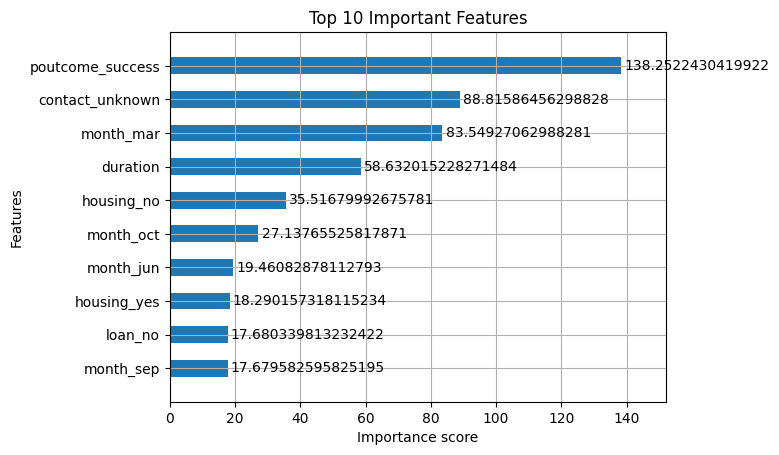

In [11]:
from xgboost import  plot_importance
# Show top 10 features by gain
plot_importance(
    xgb_clf,
    importance_type="gain",
    max_num_features=10,  # Only top 10
    height=0.5,            # Bar height
    title="Top 10 Important Features"
)
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.base import accuracy_score


lgb_estimator = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1
)

# Hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_estimator,  # Now it's defined
    param_grid=param_grid,
    scoring='accuracy',  # or 'roc_auc'
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
data

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(
    max_iter=1000,       # Increase for convergence on big data
    solver='lbfgs',      # Good default for small-medium data
    n_jobs=-1            # Parallel processing
)
numerical_cols = ["age" , "balance" , "day", "duration","campaign", "pdays","previous"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ]
)
# define pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])
# fit pipeline
clf.fit(x_train, y_train)

# predict pipeline
y_pred = clf.predict(x_test)

# 9. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8939333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94    131795
           1       0.63      0.31      0.42     18205

    accuracy                           0.89    150000
   macro avg       0.77      0.64      0.68    150000
weighted avg       0.88      0.89      0.88    150000



In [29]:
test = pd.read_csv("test.csv")

In [28]:
test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,1397,21,224,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,44,23,3,586,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,36,46,13,111,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,58,-1380,29,125,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,28,1950,22,181,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,0,18,65,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
249996,40,522,19,531,1,189,1,False,False,False,...,False,False,False,True,False,False,True,False,False,False
249997,63,33,3,178,1,92,8,False,False,False,...,False,False,False,False,False,False,False,False,True,False
249998,50,2629,30,163,2,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
test_encode = one_hot_encode_all(test)

In [ ]:
y_pred = clf.predict(test_encode)

In [30]:
submission = pd.DataFrame({
    "id": test["id"],
    "y": y_pred
})

In [31]:
submission.to_csv("submission.csv",index=False)